In [1]:
# for datasets in sim 3- counts are generated so that the ratios are close the real data noise level 2 

In [2]:
# Order of correlations: [rho_alpha_beta, rho_alpha_nu, rho_alpha_gamma, rho_beta_nu, rho_beta_gamma, rho_nu_gamma]
# Order of sigmas : [sigma_log_alpha, sigma_log_beta, sigma_log_nu, sigma_log_gamma]
# Order of means : [alpha,beta,nu,gamma]

# config_simulation = {'parameters':{ 'n_obs':800,
#     'n_vars':300,
#     'alpha':5,
#     'beta':0.6,
#     'nu' :10,
#     'gamma':0.3,
#     'alpha_':0,
#     't_max':20,
#     'noise_model':"normal",
#     'noise_level':2,
#     }, 

#     'options': {'generate_parameters':False,
#                 'generate_switch_times':True,
#                   'save':False,
#                   'saving_path':None
#                   },
#     }


# config_preprocessing = {'preprocess_params': {
#      'min_counts': 200, 
#      'min_cells': 5,
#      'n_neighbors': 23,
#      'n_pcs': 0,
#      'min_dist': 1},
# 'functions_to_apply': {'filter_cells': True, 
#                        'filter_genes': True, 
#                        'normalize_total': True,
#                        'log1p': True,
#                        'pca': True,
#                        'neighbors': True,
#                        'umap': True,
#                        'leiden': True,
#                        'moments': True}}


# # config_velocity = { 'velocity_types': ['dynamical','deterministic','stochastic','velovi']}
# config_velocity = { 'velocity_types': ['deterministic','stochastic','dynamical']}



# config_plotting = {
#     'colorsets': ['leiden', 'clusters'],
#     'velocity_embedding_stream': True,
#     'velocity_embedding_grid': True,
#     'velocity_embedding': True,
#     'rank_velocity_genes': True,
#     'velocity_confidence': True,
#     'velocity_length': True
# }



In [3]:
import os
from pathlib import Path
import sys
import numpy as np
import scvelo as scv

In [4]:
notebook_dir = os.getcwd()
notebook_dir

'c:\\Users\\OmerCagatayTalikaci\\Desktop\\github\\STVelo\\notebooks\\analysis\\nu_beta_effects'

In [5]:
Path(notebook_dir).parents[3]

WindowsPath('c:/Users/OmerCagatayTalikaci/Desktop/github')

In [6]:
os.chdir(Path(notebook_dir).parents[3])

In [7]:
stvelo_path = os.path.join(os.getcwd(),'STVelo','stvelo')

import sys  
sys.path.insert(1,stvelo_path)

from pipelines.metrics import *
from pipelines.utils import proportions_nuc_cyto

# Read adatas 

In [8]:
adata_folder_path = os.path.join(os.getcwd(), 'data', 'nu_big') 

In [9]:
import os
import anndata as ad


# Initialize an empty dictionary to store the AnnData objects
adata_dict = {}

# Loop through all files in the folder
for file_name in os.listdir(adata_folder_path):
    # Check if the file has .h5ad extension
    if file_name.endswith('.h5ad'):
        # Remove the file extension to use as the dictionary key
        key = os.path.splitext(file_name)[0]
        
        # Read the .h5ad file and store it in the dictionary
        adata_dict[key] = scv.read(os.path.join(adata_folder_path, file_name))

# Now, adata_dict contains the .h5ad files with keys as their filenames without extension


In [10]:
adatas = {k:v.copy() for k,v in adata_dict.items()}

# n_obs = 800

In [11]:
import matplotlib.pyplot as plt 

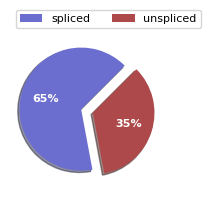

In [12]:
scv.pl.proportions(adata_dict['adata_s_u_800obs_300genes_deterministic'])

<Axes: >

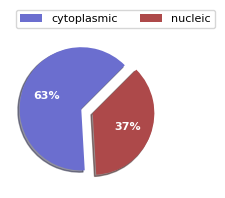

In [13]:
proportions_nuc_cyto(adata_dict['adata_n_c_800obs_300genes_deterministic'])

In [14]:
adata_dict['adata_n_c_800obs_300genes_deterministic'].var['velocity_genes'].value_counts()

velocity_genes
False    195
True     105
Name: count, dtype: int64

In [15]:
adata_dict['adata_s_u_800obs_300genes_deterministic'].var['velocity_genes'].value_counts()

velocity_genes
False    176
True     124
Name: count, dtype: int64

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


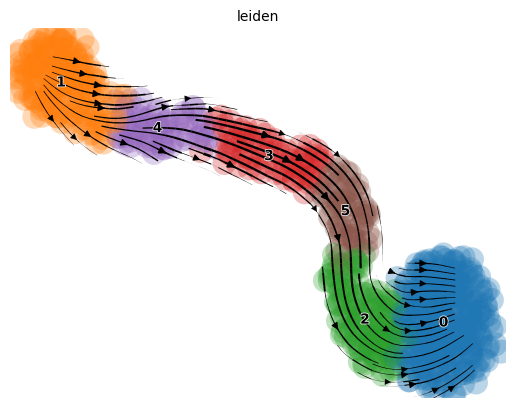

In [16]:
scv.pl.velocity_embedding_stream(adata_dict['adata_s_u_800obs_300genes_deterministic'], basis='umap', color='leiden')

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


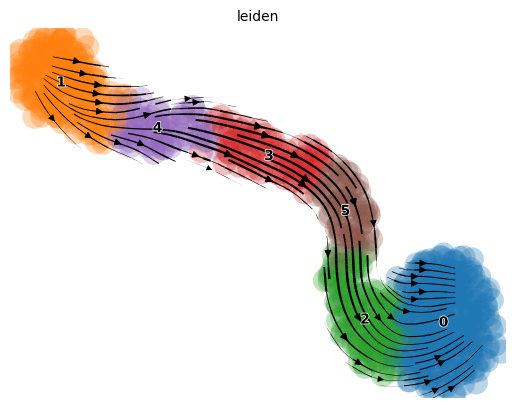

In [17]:
scv.pl.velocity_embedding_stream(adata_dict['adata_n_c_800obs_300genes_deterministic'], basis='umap', color='leiden')

# Metrics 

# Confidence 

- Confidence metric measures the mean velocity consistency by calculating the pearson correlation between a cell and its neighbours. Let $v(x_j)$ be the velocity of cell $x_j$. Confidence $c_j$ is given by;

$$c_j = \frac{1}{k} \sum_{x \in \mathit{N_k(x_j)} } corr(v(x_j),v(x))$$

where $\mathit{N_k(x_j)}$ is the k-neighbours of $x_j$ in KNN graph.


sc.pp.neighbors(adata) > scv.tl.velocity() > scv.tl.velocity_graph() to compute cosine corr. > scv.tl.velocity_confidence()

In [18]:
for d in adata_dict.keys():
    print(d)
    adata_dict[d]=compute_confidence(adata_dict[d])

adata_n_c_1000obs_300genes_deterministic
computing velocity graph (using 2/24 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:00:11) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)
adata_n_c_1000obs_300genes_dynamical
computing velocity graph (using 2/24 cores)
    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)
adata_n_c_1000obs_300genes_stochastic
computing velocity graph (using 2/24 cores)
    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> adde

<Axes: xlabel='Velocity confidence', ylabel='velo_type'>

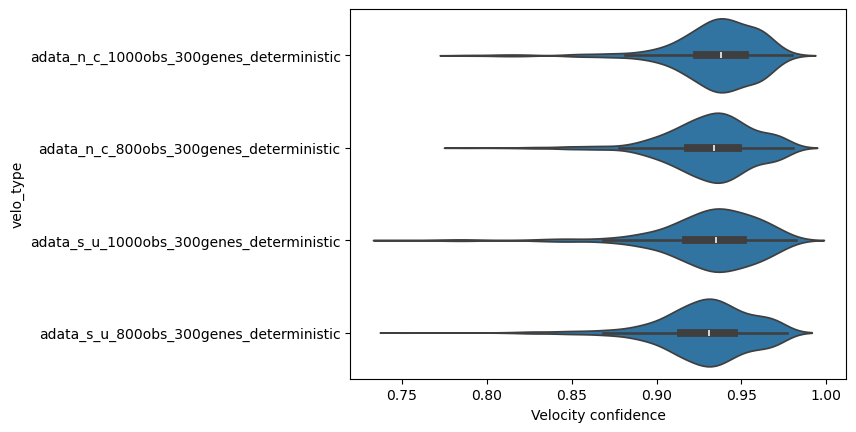

In [19]:
import seaborn as sns
confidences=get_confidences(adata_dict)
sns.violinplot(data=confidences[confidences['velo_type'].str.endswith("deterministic")],x='Velocity confidence',y='velo_type')

<Axes: xlabel='Velocity confidence', ylabel='velo_type'>

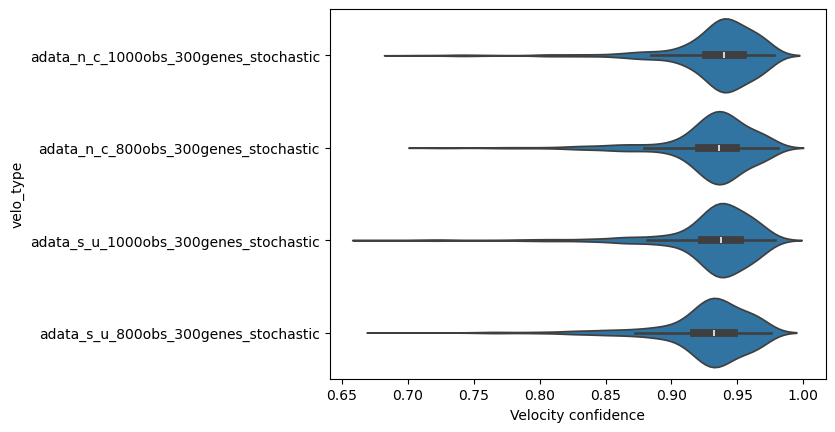

In [20]:
import seaborn as sns
confidences=get_confidences(adata_dict)
sns.violinplot(data=confidences[confidences['velo_type'].str.endswith("stochastic")],x='Velocity confidence',y='velo_type')

<Axes: xlabel='Velocity confidence', ylabel='velo_type'>

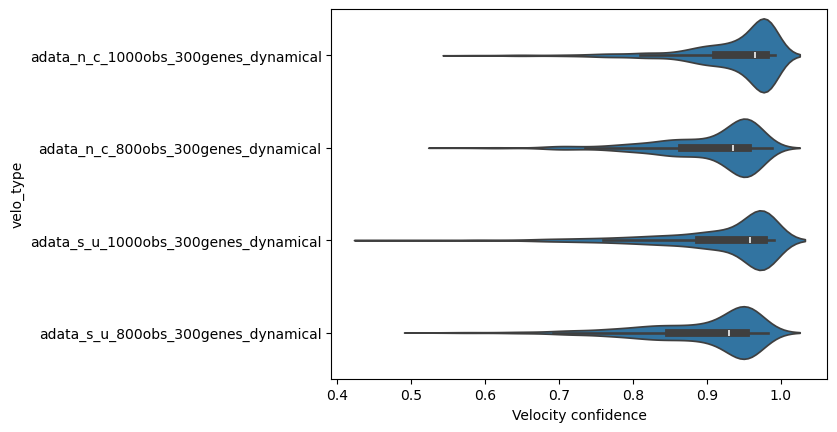

In [21]:
import seaborn as sns
confidences=get_confidences(adata_dict)
sns.violinplot(data=confidences[confidences['velo_type'].str.endswith("dynamical")],x='Velocity confidence',y='velo_type')

In [22]:
import matplotlib.pyplot as plt

# Velocity Correlation by gene

Checks if the velocities calculated for the same gene in different modalities are consistent. 

In [23]:
[adata_dict[k] for k in ['adata_s_u_800obs_300genes_deterministic','adata_n_c_800obs_300genes_deterministic']]

[AnnData object with n_obs × n_vars = 800 × 300
     obs: 'true_t', 'n_counts', 'leiden', 'velocity_self_transition', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition', 'Velocity confidence'
     var: 'true_t_', 'true_alpha', 'true_beta', 'true_nu', 'true_gamma', 'true_scaling', 'n_cells', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
     uns: 'leiden', 'log1p', 'neighbors', 'pca', 'umap', 'velocity_graph', 'velocity_graph_neg', 'velocity_params', 'leiden_colors'
     obsm: 'X_pca', 'X_umap', 'velocity_umap'
     varm: 'PCs'
     layers: 'Ms', 'Mu', 'spliced', 'spliced_cyt', 'true_velocity', 'unspliced', 'velocity'
     obsp: 'connectivities', 'distances',
 AnnData object with n_obs × n_vars = 800 × 300
     obs: 'true_t', 'n_counts', 'leiden', 'velocity_self_transition', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition', 'Velocity confidence'
     var: 'true_t_', 'true_alpha', 'true_beta', 'true_nu', 'true_g

In [24]:
adata_800 = {'adata_n_c_800obs_300genes_deterministic': adata_dict['adata_n_c_800obs_300genes_deterministic'].copy(),
             'adata_s_u_800obs_300genes_deterministic': adata_dict['adata_s_u_800obs_300genes_deterministic'].copy()}

In [25]:
velocity_correlation_by_gene=velocity_corr_against_reference(adata_800,reference='adata_s_u_800obs_300genes_deterministic', mode= 'by_gene')

Text(0, 0.5, 'Modality')

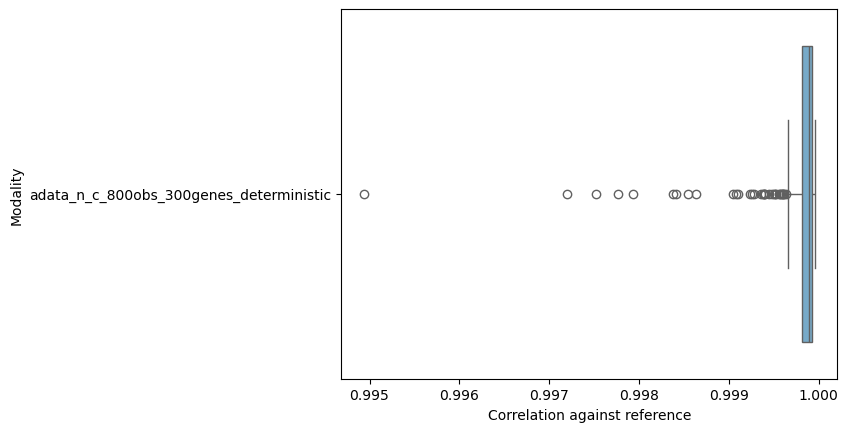

In [26]:
# velocity corr against a reference 
# import matplotlib.pyplot as plt
# sns.clustermap(velocity_correlation_by_gene.fillna(0),figsize=(7,4),cmap='Blues')
# sns.scatterplot(velocity_correlation_by_gene[:1].T)
# plt.figure(figsize=(5,5))
sns.boxplot(data=velocity_correlation_by_gene[:1].stack().reset_index(),y='level_0',x=0,palette='Blues')
plt.xlabel('Correlation against reference')
plt.ylabel('Modality')


- It looks like the model capture more or less the same dynamics for the genes in two modalities. Investigate lover correlations:

In [27]:
velo_genes_s_u = adata_800['adata_s_u_800obs_300genes_deterministic'].var['velocity_genes']
velo_genes_n_c = adata_800['adata_n_c_800obs_300genes_deterministic'].var['velocity_genes']

In [28]:
print(velo_genes_n_c.value_counts(),velo_genes_s_u.value_counts())

velocity_genes
False    195
True     105
Name: count, dtype: int64 velocity_genes
False    176
True     124
Name: count, dtype: int64


In [29]:
adata_dict['adata_s_u_800obs_300genes_deterministic'].var[adata_dict['adata_s_u_800obs_300genes_deterministic'].var['velocity_genes']==False].head()

,true_t_,true_alpha,true_beta,true_nu,true_gamma,true_scaling,n_cells,velocity_gamma,velocity_qreg_ratio,velocity_r2,velocity_genes
1,11.693030,5.0,0.6,10.0,0.3,1.0,796,0.524960,0.524960,-0.606616,False
5,10.683662,5.0,0.6,10.0,0.3,1.0,794,0.522743,0.522743,-0.091086,False
7,14.277057,5.0,0.6,10.0,0.3,1.0,798,0.507732,0.507732,-1.734332,False
8,15.445262,5.0,0.6,10.0,0.3,1.0,799,0.493717,0.493717,-3.825175,False
10,12.873804,5.0,0.6,10.0,0.3,1.0,796,0.527437,0.527437,-1.956645,False


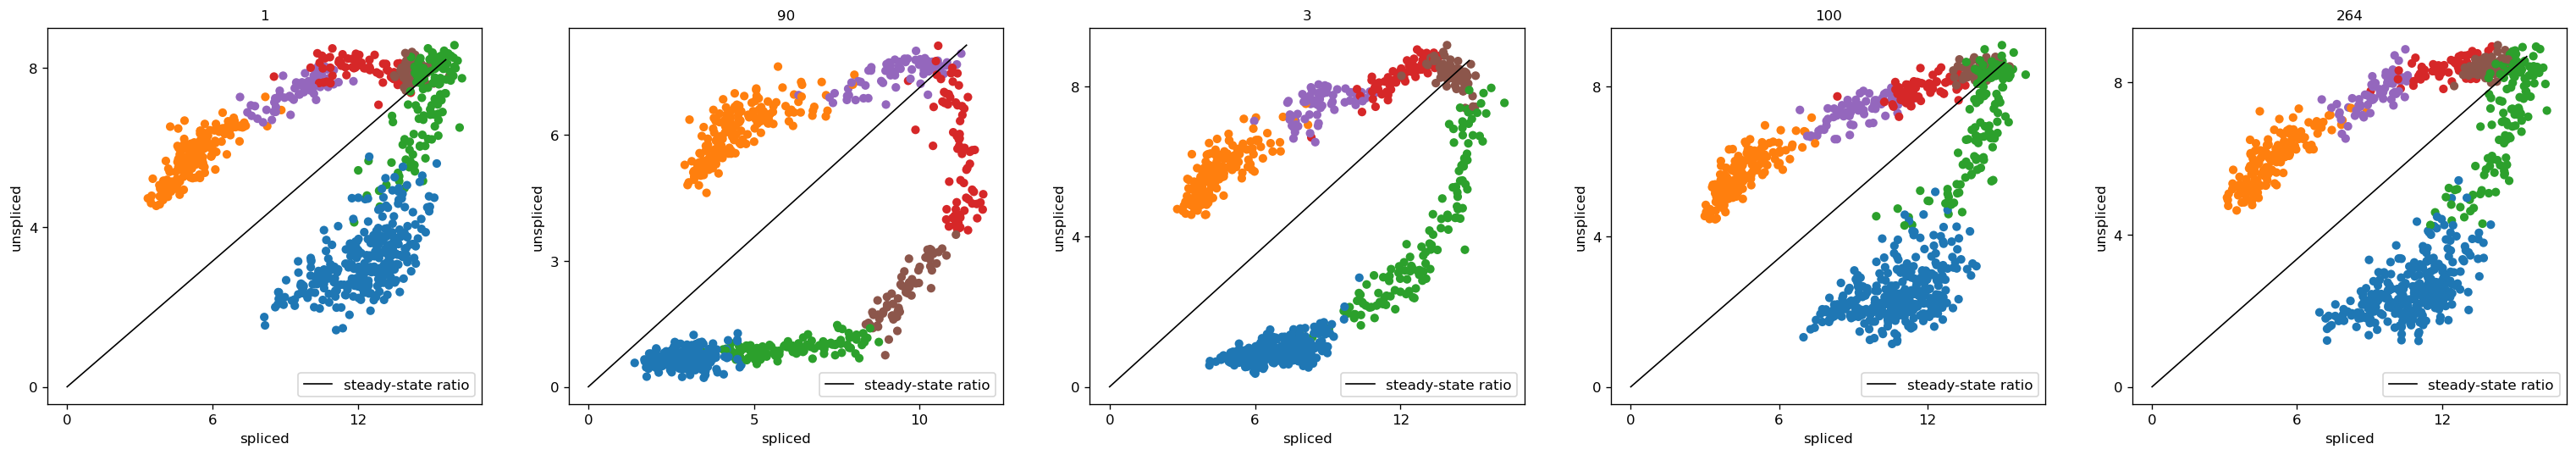

In [30]:
scv.pl.scatter(adata_dict['adata_s_u_800obs_300genes_deterministic'],color="leiden", basis=['1','90','3','100','264'], ncols=5, frameon=True,dpi=120,)

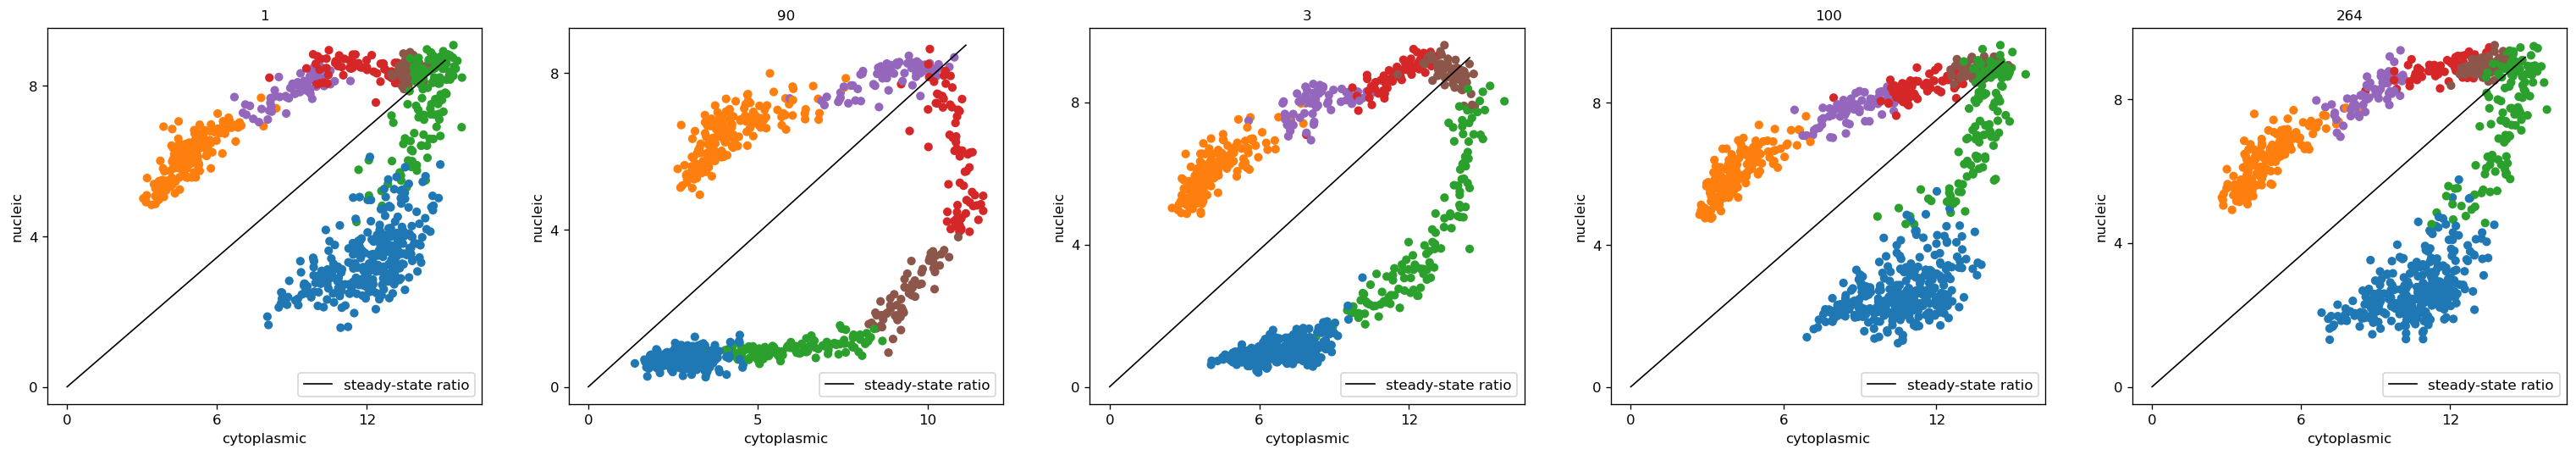

In [31]:
scv.pl.scatter(adata_dict['adata_n_c_800obs_300genes_deterministic'],color="leiden", basis=['1','90','3','100','264'], ncols=5, frameon=True,dpi=120,ylabel='nucleic',xlabel='cytoplasmic')

# Check the important genes 

In [32]:
scv.tl.rank_velocity_genes(adata_dict['adata_s_u_800obs_300genes_deterministic'], groupby='leiden', min_corr=.3)
scv.tl.rank_velocity_genes(adata_dict['adata_n_c_800obs_300genes_deterministic'], groupby='leiden', min_corr=.3)

ranking velocity genes
    finished (0:00:00) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)
ranking velocity genes
    finished (0:00:00) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


In [33]:
dfs = scv.get_df(adata_dict['adata_s_u_800obs_300genes_deterministic'].uns['rank_velocity_genes']['names'])
dfs.head(5)

,0,1,2,3,4,5
0,97,293,99,208,208,157
1,99,46,16,157,139,33
2,16,172,233,11,161,208
3,204,234,204,232,190,28
4,233,189,126,32,22,186


In [34]:
dfn = scv.get_df(adata_dict['adata_n_c_800obs_300genes_deterministic'].uns['rank_velocity_genes']['names'])
dfn.head(5)

,0,1,2,3,4,5
0,97,293,99,208,208,208
1,34,46,34,11,161,11
2,99,234,126,232,139,86
3,126,172,214,32,190,232
4,214,189,97,288,51,288


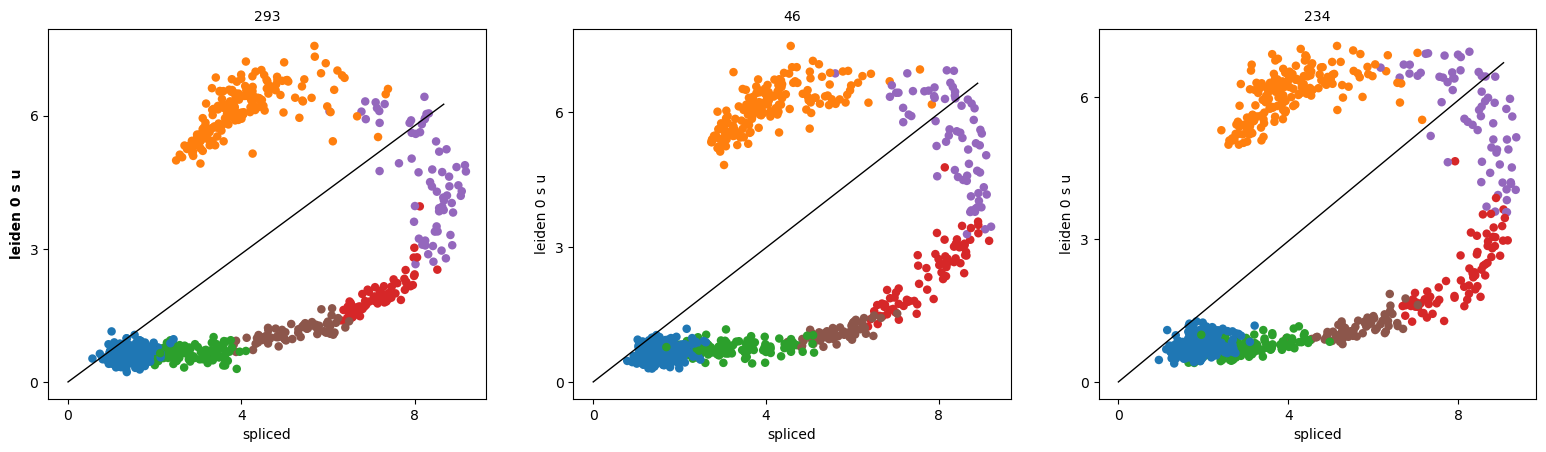

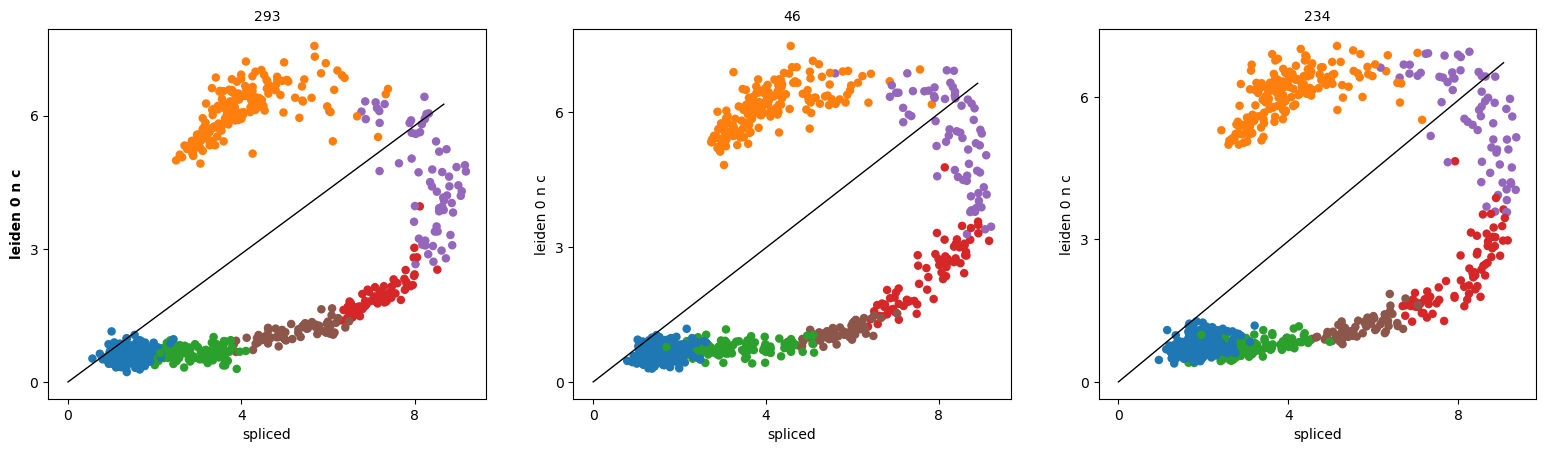

In [35]:
scv.pl.scatter(adata_dict['adata_n_c_800obs_300genes_deterministic'], dfn['1'][:3], ylabel='leiden 0 s_u', color='leiden')
scv.pl.scatter(adata_dict['adata_n_c_800obs_300genes_deterministic'], dfn['1'][:3], ylabel='leiden 0 n_c', color= 'leiden')

In [36]:
keys = ['velocity_length', 'velocity_confidence']
df = adata_dict['adata_n_c_800obs_300genes_deterministic'].obs.groupby('leiden')[keys].mean().T
df.style.background_gradient(cmap='coolwarm', axis=1)

leiden,0,1,2,3,4,5
velocity_length,9.998305,10.846069,13.891452,21.651806,17.881969,16.937031
velocity_confidence,0.929465,0.922238,0.915165,0.966710,0.957178,0.930830


In [37]:
keys = ['velocity_length', 'velocity_confidence']
df = adata_dict['adata_s_u_800obs_300genes_deterministic'].obs.groupby('leiden')[keys].mean().T
df.style.background_gradient(cmap='coolwarm', axis=1)

leiden,0,1,2,3,4,5
velocity_length,10.483853,10.960231,13.731049,22.190971,17.336363,18.534218
velocity_confidence,0.926954,0.918766,0.901153,0.966497,0.953856,0.944726


In [38]:
from sklearn.metrics.pairwise import cosine_similarity
def compute_cosine_similarity(true_velocities, estimated_velocities):
    n_genes = true_velocities.shape[1]
    cosine_similarities = np.zeros(n_genes)

    for i in range(n_genes):
        true_v = true_velocities[:, i]
        est_v = estimated_velocities[:, i]

        true_v = true_v.reshape(1, -1)
        est_v = est_v.reshape(1, -1)

        cos_sim = cosine_similarity(true_v, est_v)[0][0]

        cosine_similarities[i] = cos_sim

    return cosine_similarities

In [39]:
true_velocity = adata_dict['adata_s_u_1000obs_300genes_stochastic'].layers['true_velocity']
velocity = adata_dict['adata_s_u_1000obs_300genes_stochastic'].layers['velocity']
velocity_filtered = velocity[:, ~np.isnan(velocity).any(axis=0)]
true_velocity_filtered =  true_velocity[:, ~np.isnan(velocity).any(axis=0)]

velocity_filtered.shape

(1000, 300)

In [40]:
from scipy.stats import pearsonr, spearmanr, ttest_ind

In [41]:
true_velocity = adata_dict['adata_s_u_1000obs_300genes_stochastic'].layers['true_velocity']
velocity = adata_dict['adata_s_u_1000obs_300genes_stochastic'].layers['velocity']

In [42]:
corr_df_velocity = pd.DataFrame(columns=["Deterministic","Stochastic"], index=np.arange(len(adata_dict['adata_s_u_1000obs_300genes_stochastic'].var_names)))

In [43]:
corr_df_velocity['Deterministic'] = corr_df_velocity['Deterministic'].astype(float)
corr_df_velocity['Stochastic'] = corr_df_velocity['Stochastic'].astype(float)
# corr_df_velocity['Dynamical'] = corr_df_velocity['Dynamical'].astype(float)

In [44]:
for var_id in range(len(adata_dict['adata_s_u_1000obs_300genes_stochastic'].var_names)):
    x = adata_dict['adata_s_u_1000obs_300genes_stochastic'].layers["velocity"][:, var_id]
    y = adata_dict['adata_s_u_1000obs_300genes_stochastic'].layers["true_velocity"][:, var_id]
    corr_df_velocity.loc[var_id, "Stochastic"] = pearsonr(x, y)[0]

    x = adata_dict['adata_s_u_1000obs_300genes_deterministic'].layers["velocity"][:, var_id]
    corr_df_velocity.loc[var_id, "Deterministic"] = pearsonr(x, y)[0]

In [45]:
corr_df_velocity.describe()

,Deterministic,Stochastic
count,300.000000,300.000000
mean,0.659080,0.667594
std,0.105035,0.098742
min,0.270859,0.310154
25%,0.601807,0.604796
50%,0.695957,0.696632
75%,0.732868,0.743794
max,0.781159,0.796832


In [46]:
for var_id in range(len(adata_dict['adata_n_c_1000obs_300genes_stochastic'].var_names)):
    x = adata_dict['adata_n_c_1000obs_300genes_stochastic'].layers["velocity"][:, var_id]
    y = adata_dict['adata_n_c_1000obs_300genes_stochastic'].layers["true_velocity"][:, var_id]
    corr_df_velocity.loc[var_id, "Stochastic"] = pearsonr(x, y)[0]

    x = adata_dict['adata_n_c_1000obs_300genes_deterministic'].layers["velocity"][:, var_id]
    corr_df_velocity.loc[var_id, "Deterministic"] = pearsonr(x, y)[0]

In [47]:
corr_df_velocity.describe()

,Deterministic,Stochastic
count,300.000000,300.000000
mean,0.640462,0.647331
std,0.101931,0.095515
min,0.243425,0.289231
25%,0.579528,0.579528
50%,0.682001,0.682527
75%,0.709312,0.718910
max,0.761165,0.769316


In [48]:
compute_cosine_similarity( velocity_filtered, true_velocity_filtered).mean()

0.625694747167755

In [51]:
adata_dict['adata_n_c_1000obs_300genes_deterministic']

,true_t,n_counts,leiden,velocity_self_transition,velocity_length,velocity_confidence,velocity_confidence_transition,Velocity confidence
0,0.00,484.702319,5,0.011557,16.969999,0.886145,0.935010,0.886145
1,0.00,564.175942,5,0.001324,17.150000,0.910077,0.948700,0.910077
2,0.01,461.450321,1,0.004960,16.070000,0.911280,0.937348,0.911280
3,0.03,528.041306,5,0.000000,14.090000,0.852021,0.953153,0.852021
4,0.05,547.999384,5,0.016638,17.840000,0.901637,0.925844,0.901637
...,...,...,...,...,...,...,...,...
995,19.90,1025.977577,0,0.018755,12.330000,0.935302,0.927565,0.935302
996,19.96,953.745022,2,0.041515,12.740000,0.820095,0.915088,0.820095
997,20.00,966.027511,0,0.025639,11.820000,0.912343,0.913191,0.912343
998,20.00,970.631505,0,0.180304,9.590000,0.901697,0.746785,0.901697


In [88]:
adata_dict['adata_n_c_1000obs_300genes_dynamical'].var.sort

,true_t_,true_alpha,true_beta,true_nu,true_gamma,true_scaling,n_cells,fit_r2,fit_alpha,fit_beta,...,fit_std_s,fit_likelihood,fit_u0,fit_s0,fit_pval_steady,fit_steady_u,fit_steady_s,fit_variance,fit_alignment_scaling,velocity_genes
0,9.210945,5.0,0.6,10.0,0.3,1.0,977,0.184208,4.417450,0.613200,...,3.222711,0.370771,0.0,0.0,0.494262,8.035978,13.340528,0.434331,1.918446,True
1,11.704723,5.0,0.6,10.0,0.3,1.0,996,-0.606679,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,10.012711,5.0,0.6,10.0,0.3,1.0,987,-0.009676,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,9.163710,5.0,0.6,10.0,0.3,1.0,984,0.098151,4.387907,0.536969,...,3.214823,0.417257,0.0,0.0,0.490860,8.239908,9.534834,0.600817,2.014184,True
4,7.319093,5.0,0.6,10.0,0.3,1.0,989,0.260243,3.971839,0.544306,...,3.158194,0.369983,0.0,0.0,0.495592,6.981624,12.610748,0.988096,1.989320,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,4.349492,5.0,0.6,10.0,0.3,1.0,963,0.243889,1.213820,0.177804,...,2.373339,0.240236,0.0,0.0,0.492410,6.364944,8.264086,0.931312,4.726779,True
296,2.414075,5.0,0.6,10.0,0.3,1.0,954,0.365901,1.616393,0.303835,...,1.562755,0.302201,0.0,0.0,0.489400,5.000848,4.484961,0.313151,2.691933,True
297,13.913932,5.0,0.6,10.0,0.3,1.0,999,-1.974408,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
298,15.566869,5.0,0.6,10.0,0.3,1.0,997,-2.448250,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [71]:
df = pd.DataFrame({'index_column': index_val})

In [76]:
df

,index_column
0,99
1,166
2,283
3,262
4,34
...,...
295,20
296,286
297,52
298,210


In [116]:
(adata_dict['adata_n_c_1000obs_300genes_deterministic'].var['true_t_'][270]/20)*1000

782.9947374234265

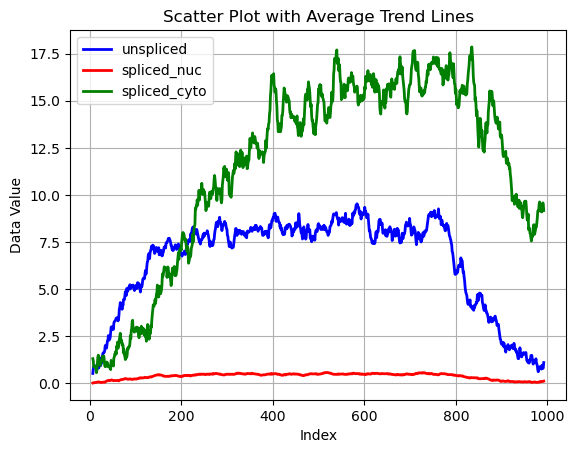

In [113]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Your sorted data arrays
data1 = adata_dict['adata_n_c_1000obs_300genes_deterministic'].layers['unspliced'][:,270]- adata_dict['adata_n_c_1000obs_300genes_deterministic'].layers['spliced_nuc'][:,270] # Replace with your actual sorted data
data2 = adata_dict['adata_n_c_1000obs_300genes_deterministic'].layers['spliced_nuc'][:,270]
data3 = adata_dict['adata_n_c_1000obs_300genes_deterministic'].layers['spliced'][:,270]

# Assuming the x-values are indices or known values
x_values = np.arange(len(data1))

# Define a function for moving average smoothing
def moving_average(y, window_size):
    return np.convolve(y, np.ones(window_size)/window_size, mode='valid')

# Set the window size for smoothing
window_size = 15  # Adjust the window size as needed

# Calculate the moving averages for each dataset
smooth_data1 = moving_average(data1, window_size)
smooth_data2 = moving_average(data2, window_size)
smooth_data3 = moving_average(data3, window_size)

# Adjust x-values for the moving averages
smooth_x_values = x_values[:len(smooth_data1)] + window_size // 2


x_vertical_line = (adata_dict['adata_n_c_1000obs_300genes_deterministic'].var['true_t_'][270]/20)*1000  

# Draw the vertical line
plt.axvline(x=x_vertical_line, color='purple', linestyle='--', linewidth=2, label='Vertical Line')
 
# # Plot the scatter plots for each dataset
# plt.scatter(x_values, data1, color='blue', marker='o', alpha=0.5, label='Data Set 1')
# plt.scatter(x_values, data2, color='red', marker='^', alpha=0.5, label='Data Set 2')
# plt.scatter(x_values, data3, color='green', marker='s', alpha=0.5, label='Data Set 3')

# Plot the smooth lines for each dataset
plt.plot(smooth_x_values, smooth_data1, color='blue', linewidth=2, label='unspliced')
plt.plot(smooth_x_values, smooth_data2, color='red', linewidth=2, label='spliced_nuc')
plt.plot(smooth_x_values, smooth_data3, color='green', linewidth=2, label='spliced_cyto')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Data Value')
plt.title('Scatter Plot with Average Trend Lines')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()
